In [149]:
import functions as funcs
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
import pickle

In [160]:
total_df = funcs.get_image_df()
total_df = funcs.train_test_split_df(total_df=total_df)

In [4]:
from ultralytics import YOLO

In [6]:
model = YOLO(model='../Yolo/best.pt')

In [60]:
yolo_folder_path = Path().cwd().parent / "Yolo"
test_images_folder_path = yolo_folder_path/'test'/'images'
image_names = ['A014_18Z_T15092_MID_x40_z0_i01j42.jpg', 'A014_18Z_T15092_MID_x40_z0_i02j06.jpg','A014_18Z_T15092_MID_x40_z0_i09j08.jpg']
test_images = [test_images_folder_path/image_name for image_name in image_names]

In [61]:
results = model.predict(source = test_images)


0: 1024x1024 1 Monocyte, 1: 1024x1024 1 Neutrophil, 2: 1024x1024 1 Neutrophil, 1 Monocyte, 19134.0ms
Speed: 37.6ms preprocess, 6378.0ms inference, 2.3ms postprocess per image at shape (1, 3, 1024, 1024)


In [51]:
from dump import plot_image_file

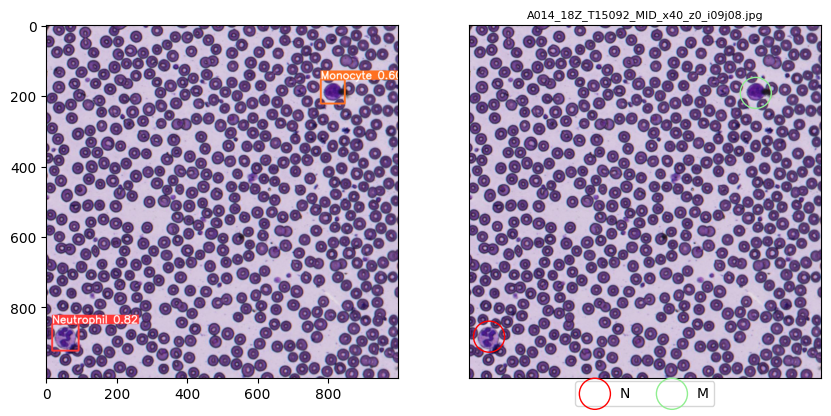

In [146]:
result_arr = results[2].plot()
result_arr = cv2.cvtColor(result_arr, cv2.COLOR_BGRA2RGB)
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plot_image_file(ax=axs[1], image_file_name=image_names[2], total_df=total_df)
axs[0].imshow(result_arr)
plt.show()

<Axes: title={'center': 'N19120_2I1_N19120_RT_x40_z0_i01j20.jpg'}>

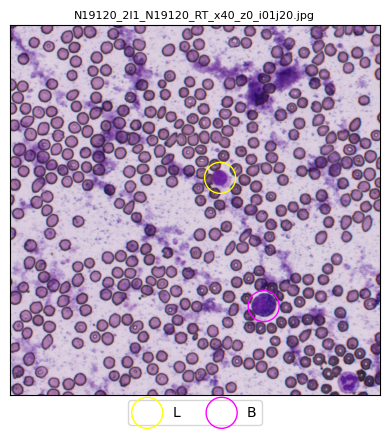

In [55]:
from dump import plot_image_file

_, ax = plt.subplots()
plot_image_file(ax=ax, image_file_name="N19120_2I1_N19120_RT_x40_z0_i01j20.jpg", total_df=total_df)

In [147]:
from result_evaluation import calculate_class_metrics

In [151]:
result_list_file = yolo_folder_path/ "results_list.pickle"
with open(file=result_list_file, mode="rb") as f:
    results_list = pickle.load(f)

In [152]:
len(results_list)

106

In [155]:
(yolo_folder_path/'test'/'labels').is_dir()

True

In [156]:
class_metrics = calculate_class_metrics(pred_results_list=results_list,label_folder_path=yolo_folder_path/'test'/'labels')

In [157]:
class_metrics

{'Neutrophil': {'true_positive': 79,
  'false_positive': 18,
  'false_negative': 0},
 'Lymphocyte': {'true_positive': 19,
  'false_positive': 14,
  'false_negative': 0},
 'Monocyte': {'true_positive': 11, 'false_positive': 19, 'false_negative': 0},
 'Eosinophil': {'true_positive': 2, 'false_positive': 5, 'false_negative': 0},
 'Basophil': {'true_positive': 0, 'false_positive': 0, 'false_negative': 0}}

In [158]:
79 + 18 + 19 + 14 + 11 + 19 + 2 + 5

167

In [168]:
list(class_metrics.keys())

['Neutrophil', 'Lymphocyte', 'Monocyte', 'Eosinophil', 'Basophil']

In [190]:
for class_name in class_metrics.values():
    print(class_name)

{'true_positive': 79, 'false_positive': 18, 'false_negative': 0}
{'true_positive': 19, 'false_positive': 14, 'false_negative': 0}
{'true_positive': 11, 'false_positive': 19, 'false_negative': 0}
{'true_positive': 2, 'false_positive': 5, 'false_negative': 0}
{'true_positive': 0, 'false_positive': 0, 'false_negative': 0}


In [174]:
true_positives = [class_metrics[class_name]['true_positive'] for class_name in class_metrics]
false_positives = [class_metrics[class_name]['false_positive'] for class_name in class_metrics]
false_negatives = [class_metrics[class_name]['false_negative'] for class_name in class_metrics]

In [182]:
try:
    overall_precision = round(sum(true_positives) / (sum(true_positives) + sum(false_positives)),2)
except ZeroDivisionError:
    print('ZeroDivisionError')

In [180]:
overall_precision

0.66

In [183]:
try:
    overall_recall = sum(true_positives) / (sum(true_positives) + sum(false_negatives))
except ZeroDivisionError:
    print(ZeroDivisionError)


In [184]:
overall_recall

1.0

In [186]:
try:
    overall_f1_score = 2 * (overall_precision * overall_recall) / (overall_precision + overall_recall)
except ZeroDivisionError:
    print("ZeroDivisionError")
overall_f1_score

0.7951807228436638

In [191]:
def get_precision_recall_f1(class_metrics:dict) -> tuple[float, float, float]:
    """ Returns the precision, recall and F1 score for a class metrics dict 
    """
    true_positives = [class_metrics[class_name]['true_positive'] for class_name in class_metrics]
    false_positives = [class_metrics[class_name]['false_positive'] for class_name in class_metrics]
    false_negatives = [class_metrics[class_name]['false_negative'] for class_name in class_metrics]
    try:
        overall_precision = round(number=sum(true_positives) / (sum(true_positives) + sum(false_positives)), ndigits= 4)
    except ZeroDivisionError:
        overall_precision = 0
    try:
        overall_recall = round(number = sum(true_positives) / (sum(true_positives) + sum(false_negatives)), ndigits= 4)
    except ZeroDivisionError:
        overall_recall = 0
    try:
        overall_f1_score = round(number=2 * (overall_precision * overall_recall) / (overall_precision + overall_recall), ndigits= 4)
    except ZeroDivisionError:
        overall_f1_score = 0
    return overall_precision, overall_recall, overall_f1_score   

In [192]:
precision, recall, f1 = get_precision_recall_f1(class_metrics=class_metrics)
precision, recall, f1

(0.6647, 1.0, 0.7986)